Made by José Miguel Santos Roldán. 13-07-2024

# Diabetes Prediction using Random Forest

In this project, I am going to analyze a dataset containing data of potential diabetes patients.

The dataset in question shathe following variables:
1. Pregnancies: Number of times pregnant.
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skin fold thickness (mm).
5. Insulin: 2-Hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg/(height in m)^2).
7. DiabetesPedigreeFunction: A function which scores the likelihood of diabetes based
on family history.e of the patient.iabetes. . 

Finally, the dataset contains a Variable called "Outcome", which indicates if the patient has diabetes (1) or not (0).

Based on this data, we are going to use the K-fold cross-validation classification algorithm to pr Outcome va able  (0 orn  1) value based ovalues of th .other variablesm This will allow us find which of the included health conditions is more influential on a diadiagnostic.orest.

In [28]:
# Data preprocessing
# Clearing the workspace
rm(list=ls())

# Reading the first 3 lines of the dataset to understand its structure
readLines("diabetes.csv", 3)

[1] "Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome"
[2] "6,148,72,35,0,33.6,0.627,50,1"                                                                   
[3] "1,85,66,29,0,26.6,0.351,31,0"

In [29]:
# Loading the diabetes dataset
data_diabetes = read.csv("diabetes.csv", sep = ",", dec = ".", header = TRUE)
View(data_diabetes)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [30]:
# Checking size of the dataset
dim(data_diabetes)

[1] 768   9

In [31]:
# Checking for any missing values in the dataset
sum(is.na(data_diabetes))

[1] 0

In [32]:
# Now we convert the Outcome variable to a factor since we are performing classification
data_diabetes$Outcome = as.factor(data_diabetes$Outcome)

- Part 1: K-fold Cross-Validation for Decision Trees

In [17]:
# Loading necessary libraries for decision trees and plotting
library(rpart)
library(rpart.plot)

# K-fold cross-validation setup
nfolds = 5  # Number of folds for cross-validation

# This data frame will store results of model quality metrics for each fold
modelqualityresults = data.frame(accuracy = rep(0, nfolds),
                                 sensitivity = rep(0, nfolds),
                                 specificity = rep(0, nfolds))

# Creating a list to handle folds for cross-validation
folds = list()

# Creating indices for splitting data into folds
inivec = 1:length(data_diabetes$Outcome) 

# Splitting data into training and test sets for each fold
for(i in 1:(nfolds-1)) {
  split = sample(inivec, floor(length(data_diabetes$Outcome) / nfolds), replace = FALSE)
  folds[[i]] = split
  inivec = inivec[!(inivec %in% split)]
}
folds[[nfolds]] = inivec

# Iterating through each fold to train and test the model
for(i in 1:nfolds) {
  training_set = data_diabetes[-folds[[i]],]  # Training set
  test_set = data_diabetes[folds[[i]],]       # Test set

  # Training a decision tree model
  mytree = rpart(formula = Outcome ~ ., data = training_set, method = "class")

  # Predicting the outcomes on the test set
  pred = predict(mytree, test_set, type = "class")

  # Creating a confusion matrix to compare actual vs predicted outcomes
  conf_matrix = table(test_set$Outcome, pred, dnn = c("Actual value", "Classifier prediction"))
  conf_matrix_prop = prop.table(conf_matrix)

  # Calculating model quality metrics
  modelqualityresults$accuracy[i] = sum(diag(conf_matrix)) / sum(conf_matrix)
  modelqualityresults$sensitivity[i] = conf_matrix[1,1] / sum(conf_matrix[,1])
  modelqualityresults$specificity[i] = conf_matrix[2,2] / sum(conf_matrix[,2])
}

# Creating a data frame with values of parameters for each fold for plotting
plotmodelqualityresults = data.frame(values = c(modelqualityresults$accuracy,
                                                modelqualityresults$sensitivity,
                                                modelqualityresults$specificity),
                                     parameter = as.factor(c(rep("accuracy", nfolds),
                                                             rep("sensitivity", nfolds),
                                                             rep("specificity", nfolds))))


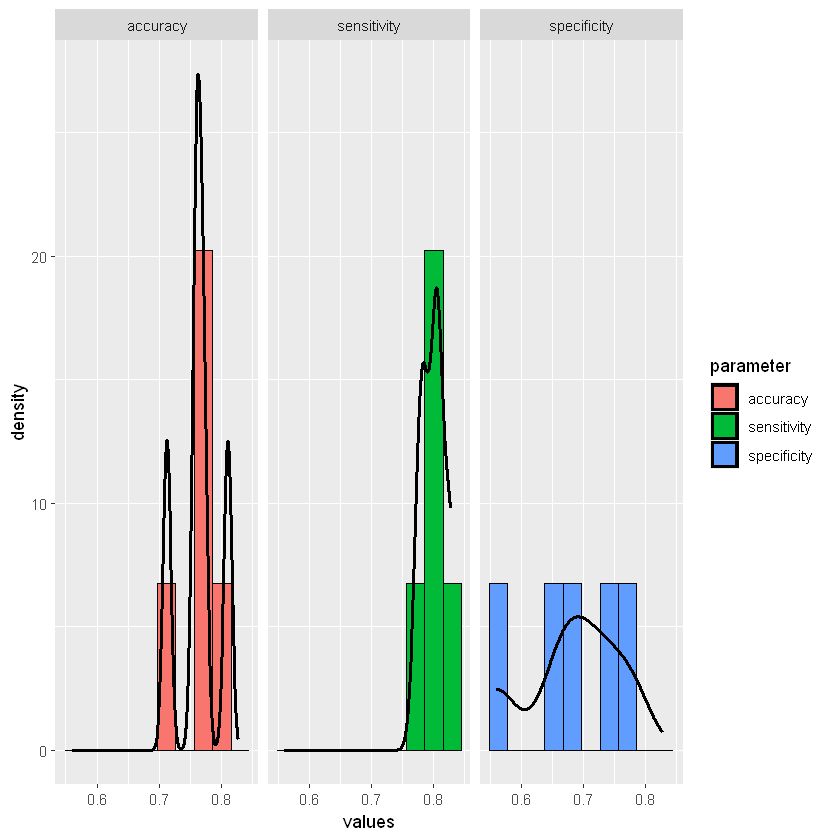

In [18]:
# Loading the ggplot2 library for plotting
library(ggplot2)

# Plotting histograms and density plots for model quality metrics
ggplot(data = plotmodelqualityresults) +
  aes(x = values, fill = parameter) +
  geom_histogram(bins = 10, colour = "black", aes(y = ..density..)) +
  geom_density(colour = "black", alpha = 0, size = 1) +
  facet_grid(. ~ parameter)

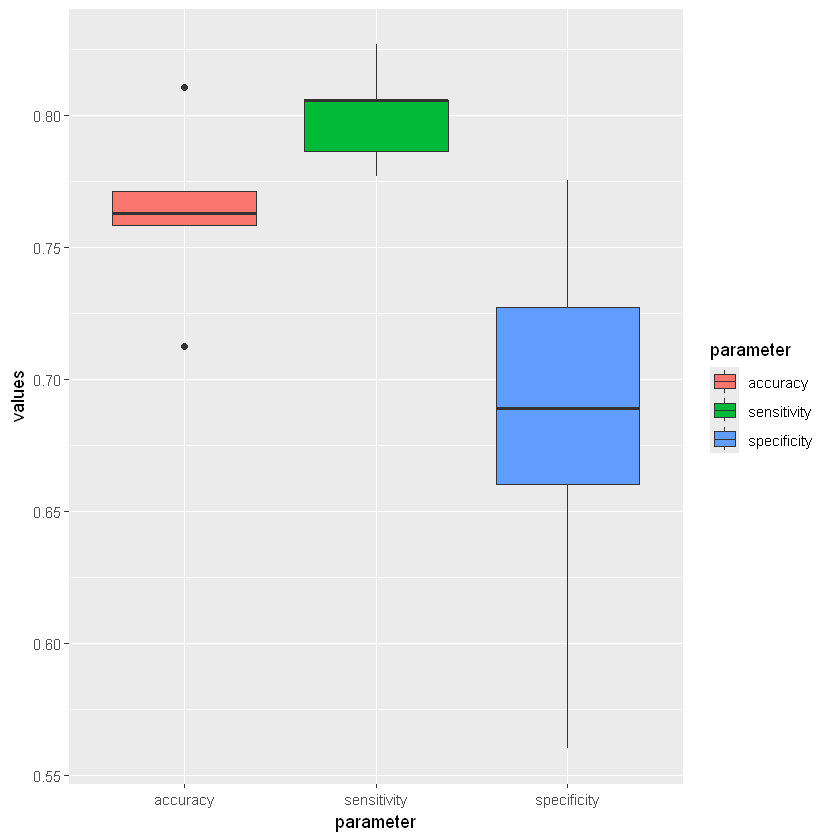

In [19]:
# Plotting boxplots for model quality metrics
ggplot(data = plotmodelqualityresults) +
  aes(x = parameter, fill = parameter, y = values) +
  geom_boxplot()

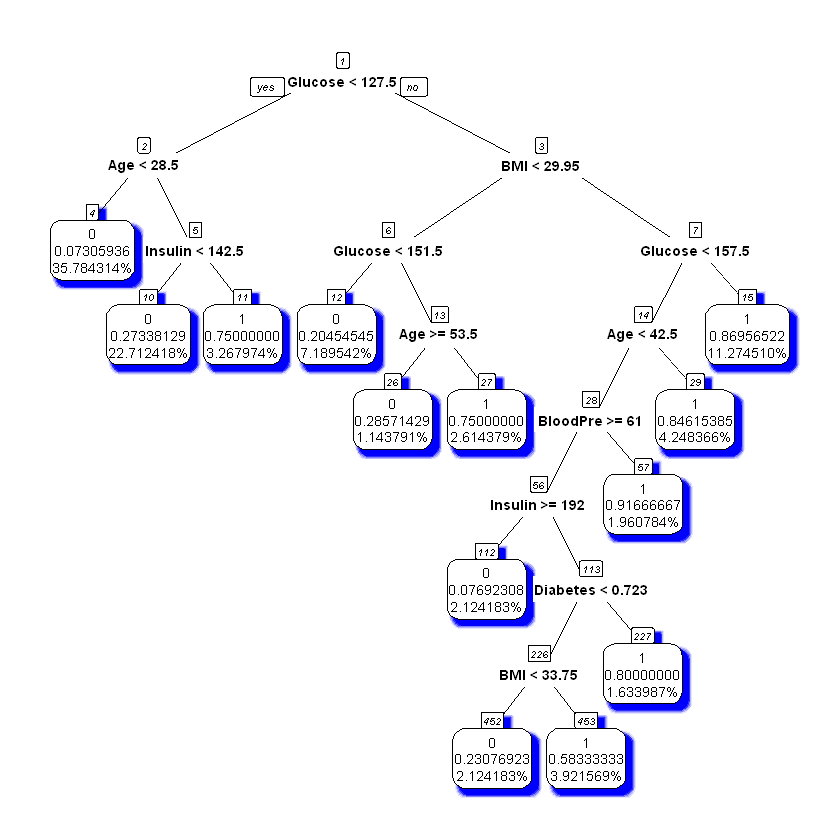

In [20]:
# Plotting the decision tree using prp from rpart.plot
prp(mytree,
    type = 0,
    extra = 106,
    nn = TRUE,
    shadow.col = "blue",
    digits = 22,
    roundint = FALSE)

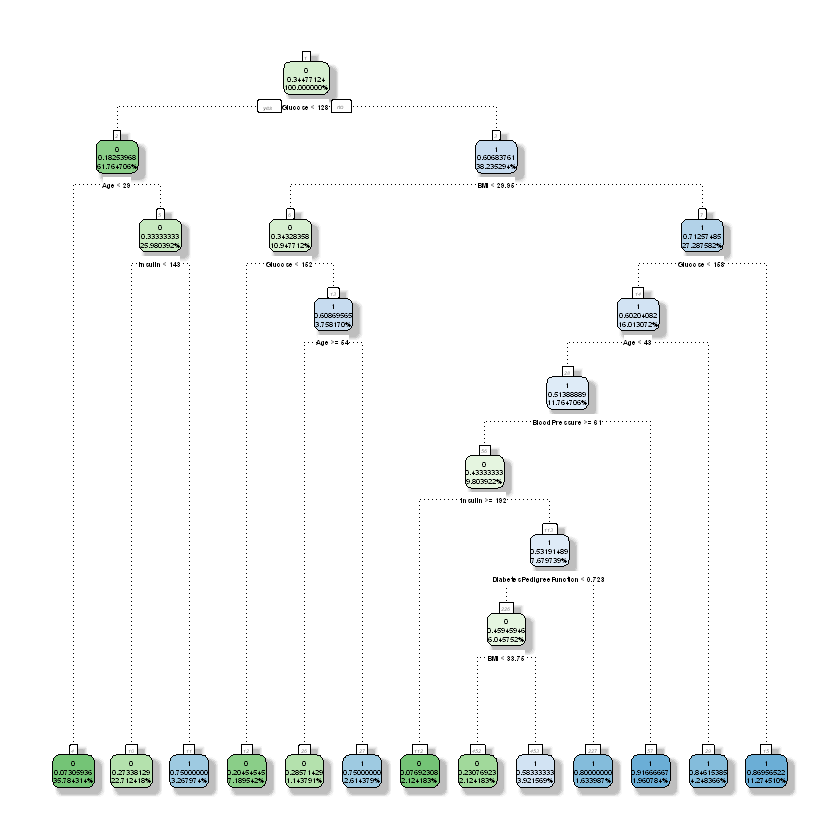

In [21]:
# Advanced plotting of the decision tree using rpart.plot
rpart.plot(mytree, 
           box.palette = "GnBu", # color scheme
           branch.lty = 3,       # dotted branch lines
           shadow.col = "gray",  # shadows under the node boxes
           digits = 20,
           nn = TRUE)

In [22]:
# Final prediction using the decision tree
pred = predict(mytree, test_set, type = "class")

# Computing the confusion matrix for the final prediction
conf_matrix = table(test_set$Outcome, pred, dnn = c("Actual value", "Classifier prediction"))
conf_matrix_prop = prop.table(conf_matrix)

# Calculating error estimates for the final model
accuracy = sum(diag(conf_matrix)) / sum(conf_matrix)
precision = conf_matrix[1,1] / sum(conf_matrix[,1])
specificity = conf_matrix[2,2] / sum(conf_matrix[,2])

In [23]:
# Printing the confusion matrix proportions and model quality metrics
cat("Confusion matrix")
print(conf_matrix_prop)
cat("Accuracy:")
print(accuracy)
cat("Precision:")
print(precision)
cat("Specificity:")
print(specificity)

Confusion matrix            Classifier prediction
Actual value          0          1
           0 0.55769231 0.07692308
           1 0.16025641 0.20512821
Accuracy:[1] 0.7628205
Precision:[1] 0.7767857
Specificity:[1] 0.7272727


- Part 2: Random Forest using K-fold Cross-Validation

In [33]:
# Part 5: Random Forest Modeling
library(randomForest)

# Initial parameters for k-fold cross-validation
nfolds = 5
modqualres_1 = data.frame(accuracy = rep(0, nfolds),
                          sensitivity = rep(0, nfolds),
                          specificity = rep(0, nfolds))

# List to store results of model quality metrics for each parameter combination
listmodqualres_1 = list()

# Grid of parameters to tune for random forest
paramsForest = expand.grid(ntree = seq(50, 300, 10), mtry = seq(1, 9, 3))
folds = list()
inivec = 1:length(data_diabetes$Outcome)

# Creating folds for cross-validation
for (i in 1:(nfolds - 1)) {
  split = sample(inivec, floor(length(data_diabetes$Outcome) / nfolds), replace = FALSE)
  folds[[i]] = split
  inivec = inivec[!(inivec %in% split)]
}
folds[[nfolds]] = inivec

# Train and evaluate random forest models
for (j in 1:nrow(paramsForest)) {
  cat("Model", j, "of", nrow(paramsForest), "\n")
  for (i in 1:nfolds) {
    training_set = data_diabetes[-folds[[i]], ]
    test_set = data_diabetes[folds[[i]], ]
    
    # Training a random forest model
    forest = randomForest(formula = Outcome ~ ., data = training_set,
                          mtry = paramsForest$mtry[j], ntree = paramsForest$ntree[j])
    
    # Predicting the outcomes on the test set
    pred = predict(forest, test_set, type = "class")
    
    # Creating a confusion matrix to compare actual vs predicted outcomes
    conf_matrix = table(test_set$Outcome, pred, dnn = c("Actual value", "Classifier prediction"))
    
    # Calculating model quality metrics
    modqualres_1$accuracy[i] = sum(diag(conf_matrix)) / sum(conf_matrix)
    modqualres_1$sensitivity[i] = conf_matrix[1,1] / sum(conf_matrix[,1])
    modqualres_1$specificity[i] = conf_matrix[2,2] / sum(conf_matrix[,2])
  }  
  
  # Storing the results for each parameter combination
  listmodqualres_1[[j]] = modqualres_1
  paramsForest$accuracy[j] = mean(modqualres_1$accuracy)
  paramsForest$sensitivity[j] = mean(modqualres_1$sensitivity)
  paramsForest$specificity[j] = mean(modqualres_1$specificity)
}

# data frame with values of parameters for each fold
plotmodelqualityresults_1 = data.frame(values = c(paramsForest$accuracy,
                                                  paramsForest$sensitivity,
                                                  paramsForest$specificity),
                                       parameter = as.factor(c(rep("accuracy", length(paramsForest$accuracy)),
                                                               rep("sensitivity", length(paramsForest$accuracy)),
                                                               rep("specificity", length(paramsForest$accuracy)))))


Model 1 of 78 
Model 2 of 78 
Model 3 of 78 
Model 4 of 78 
Model 5 of 78 
Model 6 of 78 
Model 7 of 78 
Model 8 of 78 
Model 9 of 78 
Model 10 of 78 
Model 11 of 78 
Model 12 of 78 
Model 13 of 78 
Model 14 of 78 
Model 15 of 78 
Model 16 of 78 
Model 17 of 78 
Model 18 of 78 
Model 19 of 78 
Model 20 of 78 
Model 21 of 78 
Model 22 of 78 
Model 23 of 78 
Model 24 of 78 
Model 25 of 78 
Model 26 of 78 
Model 27 of 78 
Model 28 of 78 
Model 29 of 78 
Model 30 of 78 
Model 31 of 78 
Model 32 of 78 
Model 33 of 78 
Model 34 of 78 
Model 35 of 78 
Model 36 of 78 
Model 37 of 78 
Model 38 of 78 
Model 39 of 78 
Model 40 of 78 
Model 41 of 78 
Model 42 of 78 
Model 43 of 78 
Model 44 of 78 
Model 45 of 78 
Model 46 of 78 
Model 47 of 78 
Model 48 of 78 
Model 49 of 78 
Model 50 of 78 
Model 51 of 78 
Model 52 of 78 
Model 53 of 78 
Model 54 of 78 
Model 55 of 78 
Model 56 of 78 
Model 57 of 78 
Model 58 of 78 
Model 59 of 78 
Model 60 of 78 
Model 61 of 78 
Model 62 of 78 
Model 63 of 78 
M

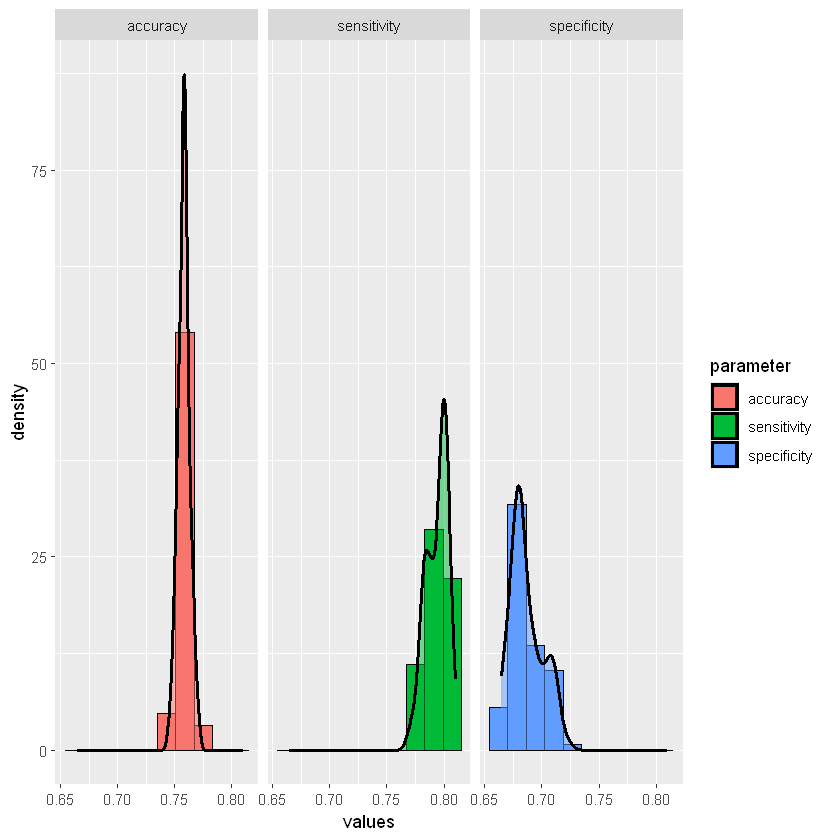

In [34]:
# Plotting histograms and density plots for random forest model quality metrics
ggplot(data = plotmodelqualityresults_1) +
  aes(x = values, fill = parameter) +
  geom_histogram(bins = 10, colour = "black", aes(y = ..density..)) +
  geom_density(colour = "black", alpha = 0.5, size = 1) +
  facet_grid(. ~ parameter) + labs()

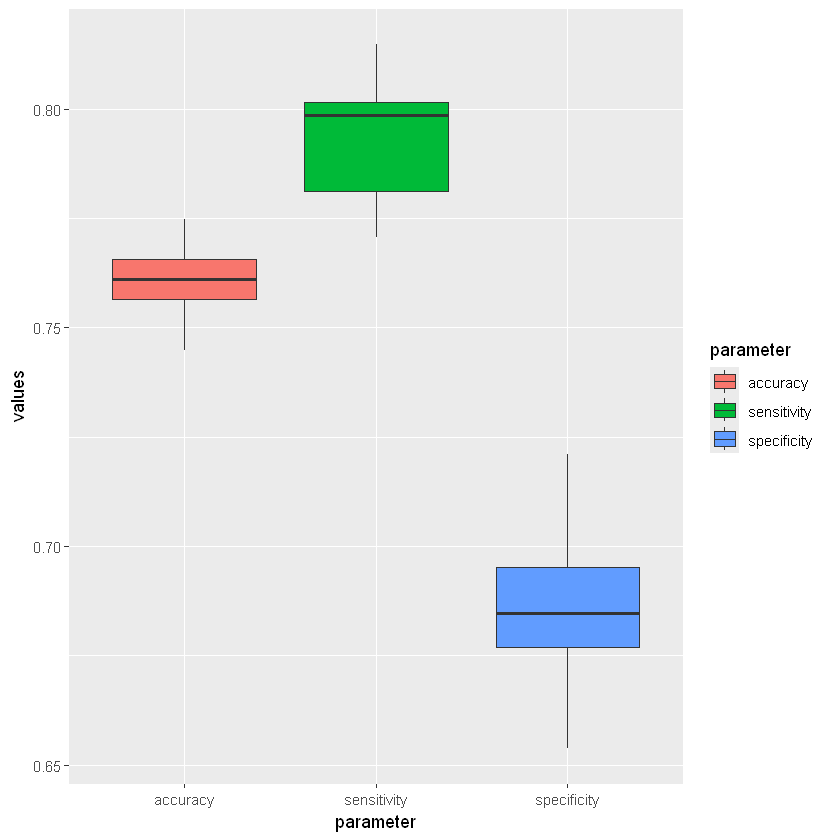

In [24]:
# Plotting boxplots for random forest model quality metrics
ggplot(data = plotmodelqualityresults_1) +
  aes(x = parameter, fill = parameter, y = values) +
  geom_boxplot()

In [25]:
# Checking for the best parameters and hyperparameters of the random forest
cat("Best parameters based on accuracy:\n")
print(paramsForest[which.max(paramsForest$accuracy), ])
cat("Best parameters based on sensitivity:\n")
print(paramsForest[which.max(paramsForest$sensitivity), ])
cat("Best parameters based on specificity:\n")
print(paramsForest[which.max(paramsForest$specificity), ])
cat("Best parameters based on mean of accuracy, sensitivity, and specificity:\n")
print(paramsForest[which.max(rowMeans(paramsForest[, c(3:5)])), ])

Best parameters based on accuracy:
   ntree mtry  accuracy sensitivity specificity
29    70    4 0.7747863   0.8148494   0.6895172
Best parameters based on sensitivity:
   ntree mtry  accuracy sensitivity specificity
29    70    4 0.7747863   0.8148494   0.6895172
Best parameters based on specificity:
   ntree mtry  accuracy sensitivity specificity
17   210    1 0.7670437   0.7848863   0.7211138
Best parameters based on mean of accuracy, sensitivity, and specificity:
   ntree mtry accuracy sensitivity specificity
48   260    4 0.773454   0.8062278   0.7011782


In [28]:
# Extracting the best results based on the mean of accuracy, sensitivity, and specificity
bestframe_1 = listmodqualres_1[[which.max(rowMeans(paramsForest[, c(3:5)]))]]
plotbestresults_1 = data.frame(values = c(bestframe_1$accuracy,
                                          bestframe_1$sensitivity,
                                          bestframe_1$specificity),
                               parameter = as.factor(c(rep("accuracy", length(bestframe_1$accuracy)),
                                                       rep("sensitivity", length(bestframe_1$sensitivity)),
                                                       rep("specificity", length(bestframe_1$specificity)))))

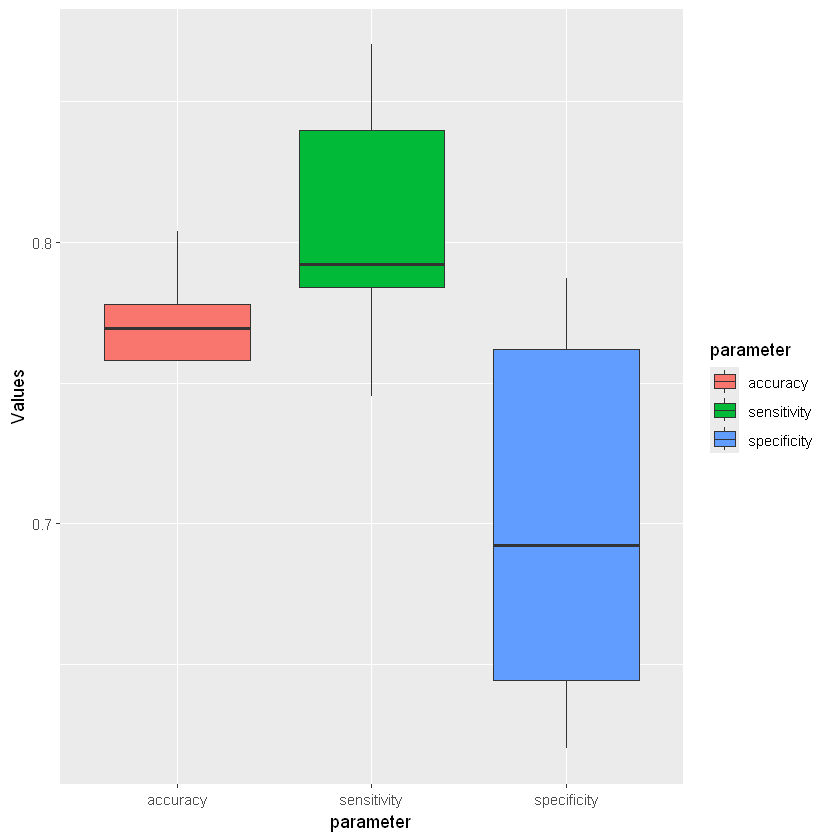

In [29]:
# Plotting boxplots that show the best model quality metrics
ggplot(data = plotbestresults_1) +
  aes(x = parameter, fill = parameter, y = values) +
  geom_boxplot() + labs(y = "Values")

In [33]:
# Plotting the random forest model showing error against number of trees
cat("Best parameters based on accuracy:\n")
print(paramsForest[which.max(paramsForest$accuracy), ])

Best parameters based on accuracy:
   ntree mtry  accuracy sensitivity specificity
29    70    4 0.7747863   0.8148494   0.6895172


As we can see, with 70 trees and 4 candidate variables, we get a 77.4% accuracy for the best model.

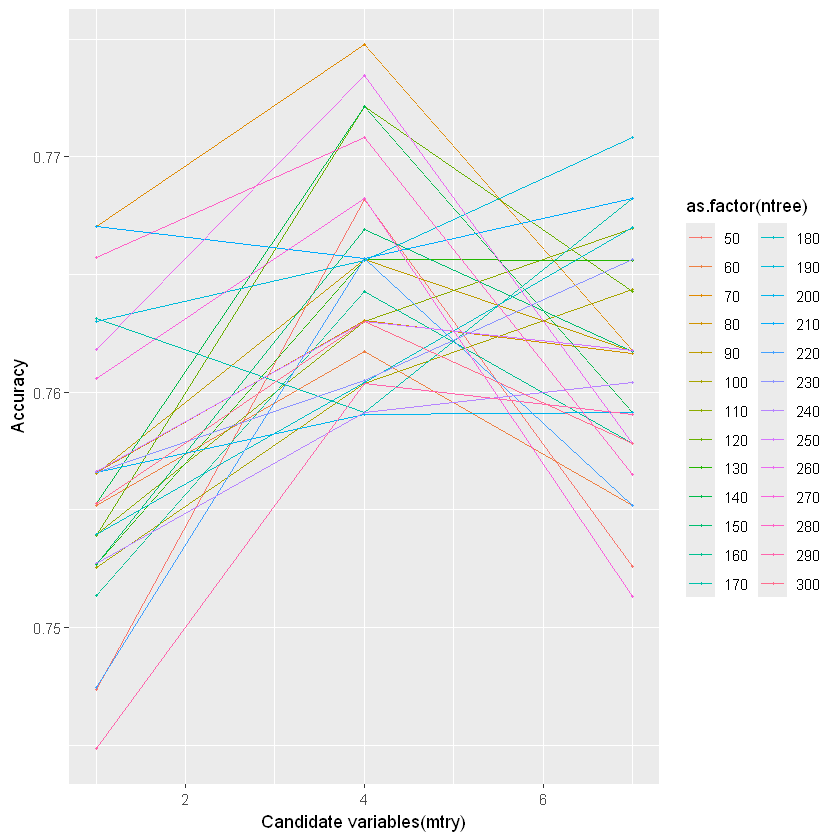

In [34]:
# Plotting accuracy against the values of mtry and ntree
ggplot(paramsForest) +
  aes(x = mtry, y = accuracy, color = as.factor(ntree)) +
  geom_point(size = 0.5) + geom_line(size = 0.5) + labs("Accuracy against candidate variables and number of trees") + 
  xlab("Candidate variables(mtry)") + ylab("Accuracy")

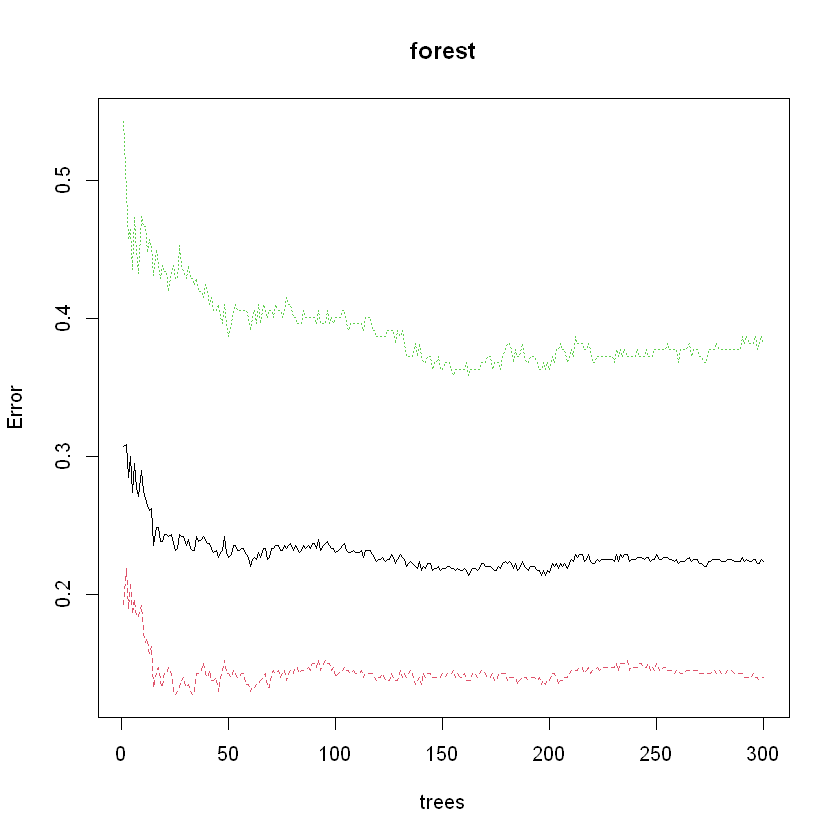

In [35]:
# Plotting of the error against number of trees
plot(forest)

In [36]:
# Final code for training the best model on the entire dataset
#------------------------------------------------------------------------------#
aux = which.max(paramsForest[,3])
paramsForest[aux,]

# Training the best random forest model
bestclassifier = randomForest(formula = Outcome ~ ., data = data_diabetes,
                              mtry = paramsForest$mtry[aux], ntree = paramsForest$ntree[aux])

# Predicting outcomes using the best model
predicted = predict(bestclassifier, data_diabetes, type = "class")
mean(predicted == data_diabetes$Outcome)

# This function saves the best model with all its parameters, confusion matrix and prediction.
# It allows use to use the best model when needed
finalModel = function(data_diabetes) {
  set.seed(123)
  predicted = predict(bestclassifier, data_diabetes, type = "class")
  conf_matrix = table(data_diabetes$Outcome, predicted, dnn = c("Actual value", "Classifier prediction"))
  conf_matrix_prop = prop.table(conf_matrix)
  
  accuracy = sum(diag(conf_matrix)) / sum(conf_matrix)
  precision = conf_matrix[1,1] / sum(conf_matrix[,1])
  specificity = conf_matrix[2,2] / sum(conf_matrix[,2])
  
  return(list(prediction = predicted,
              conf_matrix = conf_matrix,
              conf_matrix_prop = conf_matrix_prop,
              accuracy = accuracy,
              precision = precision,
              specificity = specificity))
}

# Saving the best model to a .Rdata file for further use
save(bestclassifier, file = "my_model.Rdata")

,ntree,mtry,accuracy,sensitivity,specificity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,70,4,0.7747863,0.8148494,0.6895172


[1] 1